# Credit Risk Analysis

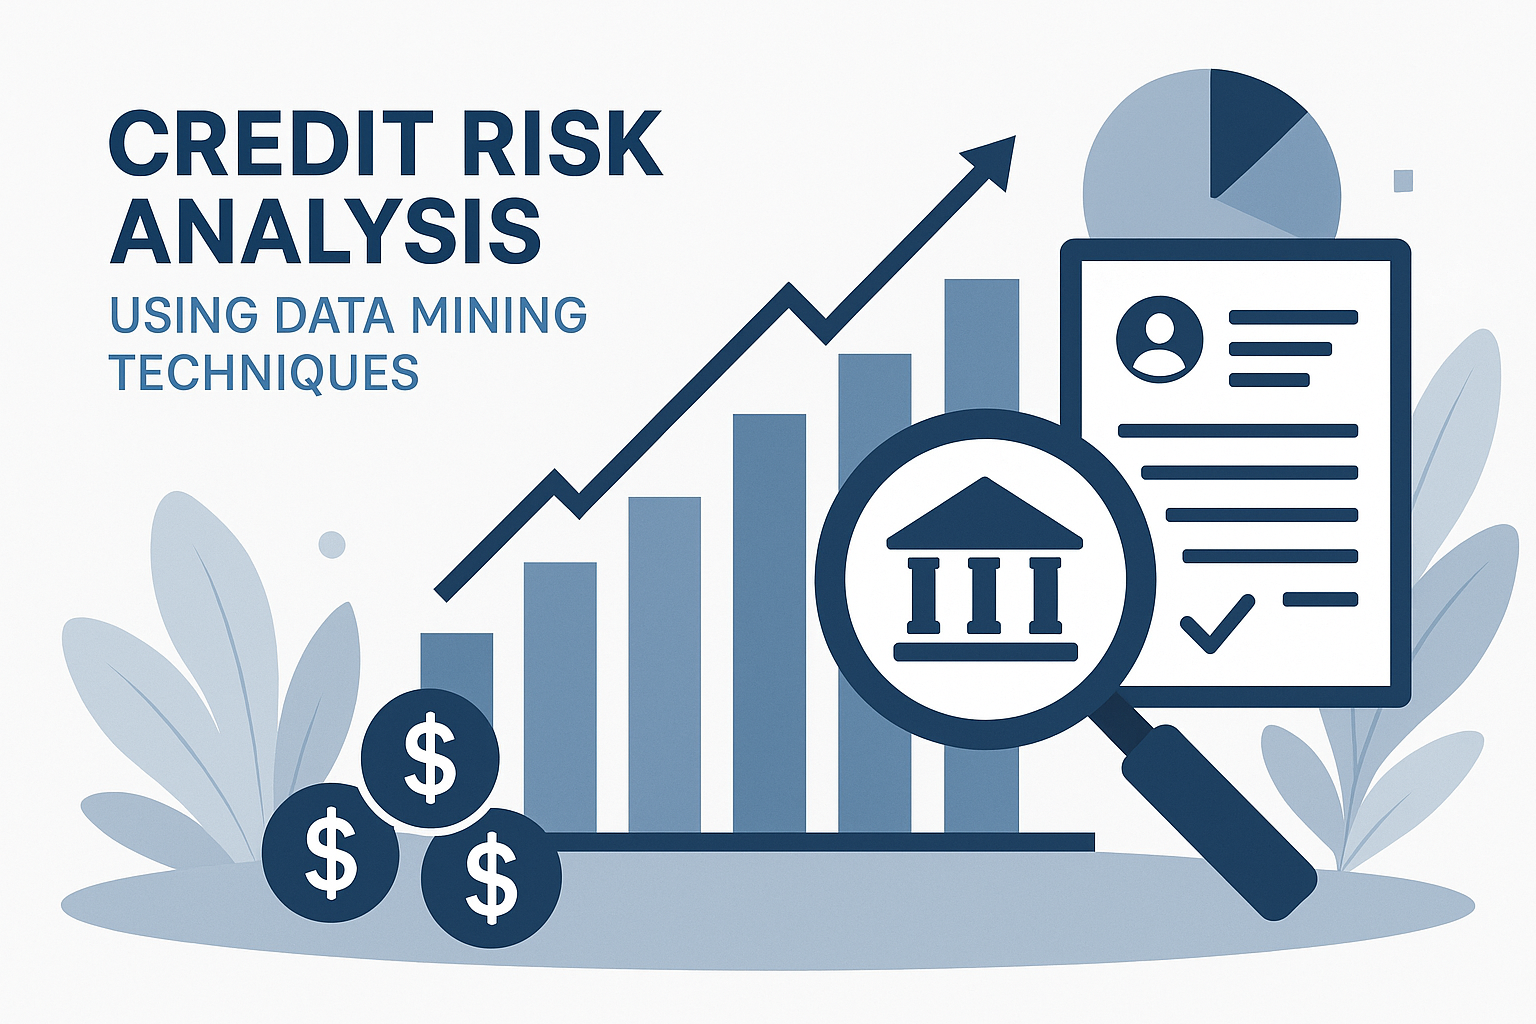

In [1]:
from IPython.display import Image, display
display(Image(filename='main.png'))

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline
%matplotlib inline

# Load and Inspect Data

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatus",
    "OtherDebtors", "ResidenceSince", "Property", "Age",
    "OtherInstallmentPlans", "Housing", "ExistingCredits",
    "Job", "NumLiablePeople", "Telephone", "ForeignWorker", "Target"
]
data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Inspect the first few rows
print(data.head())

  Status  Duration CreditHistory Purpose  CreditAmount Savings Employment  \
0    A11         6           A34     A43          1169     A65        A75   
1    A12        48           A32     A43          5951     A61        A73   
2    A14        12           A34     A46          2096     A61        A74   
3    A11        42           A32     A42          7882     A61        A74   
4    A11        24           A33     A40          4870     A61        A73   

   InstallmentRate PersonalStatus OtherDebtors  ...  Property Age  \
0                4            A93         A101  ...      A121  67   
1                2            A92         A101  ...      A121  22   
2                2            A93         A101  ...      A121  49   
3                2            A93         A103  ...      A122  45   
4                3            A93         A101  ...      A124  53   

   OtherInstallmentPlans Housing ExistingCredits   Job NumLiablePeople  \
0                   A143    A152               2

In [4]:
print("\nDataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   Employment             1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   PersonalStatus         1000 non-null   object
 9   OtherDebtors           1000 non-null   object
 10  ResidenceSince         1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  Exis

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Status                   0
Duration                 0
CreditHistory            0
Purpose                  0
CreditAmount             0
Savings                  0
Employment               0
InstallmentRate          0
PersonalStatus           0
OtherDebtors             0
ResidenceSince           0
Property                 0
Age                      0
OtherInstallmentPlans    0
Housing                  0
ExistingCredits          0
Job                      0
NumLiablePeople          0
Telephone                0
ForeignWorker            0
Target                   0
dtype: int64


# Data Preprocessing

In [6]:
# Encode target variable (1 for Good customers, 0 for Bad customers)
data['Target'] = data['Target'].map({1: 0, 2: 1})

# Convert categorical variables to dummy variables
categorical_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Separate features and target
X = data.drop("Target", axis=1)
y = data["Target"]

# Print dataset shape
print(f"Features shape: {X.shape}, Target shape: {y.shape}")


Features shape: (1000, 48), Target shape: (1000,)


# Exploratory Data Analysis (EDA)
# Visualizations

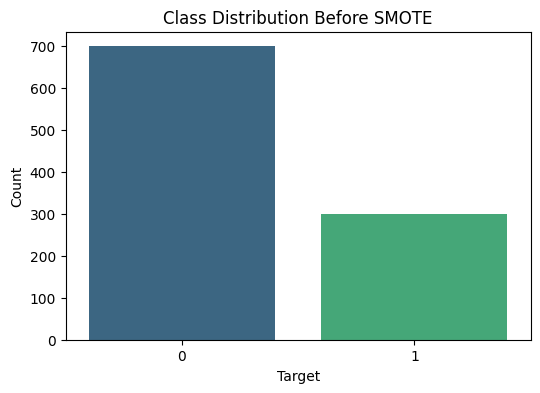

In [7]:
# Class Distribution Before SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x="Target", data=data, palette="viridis")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

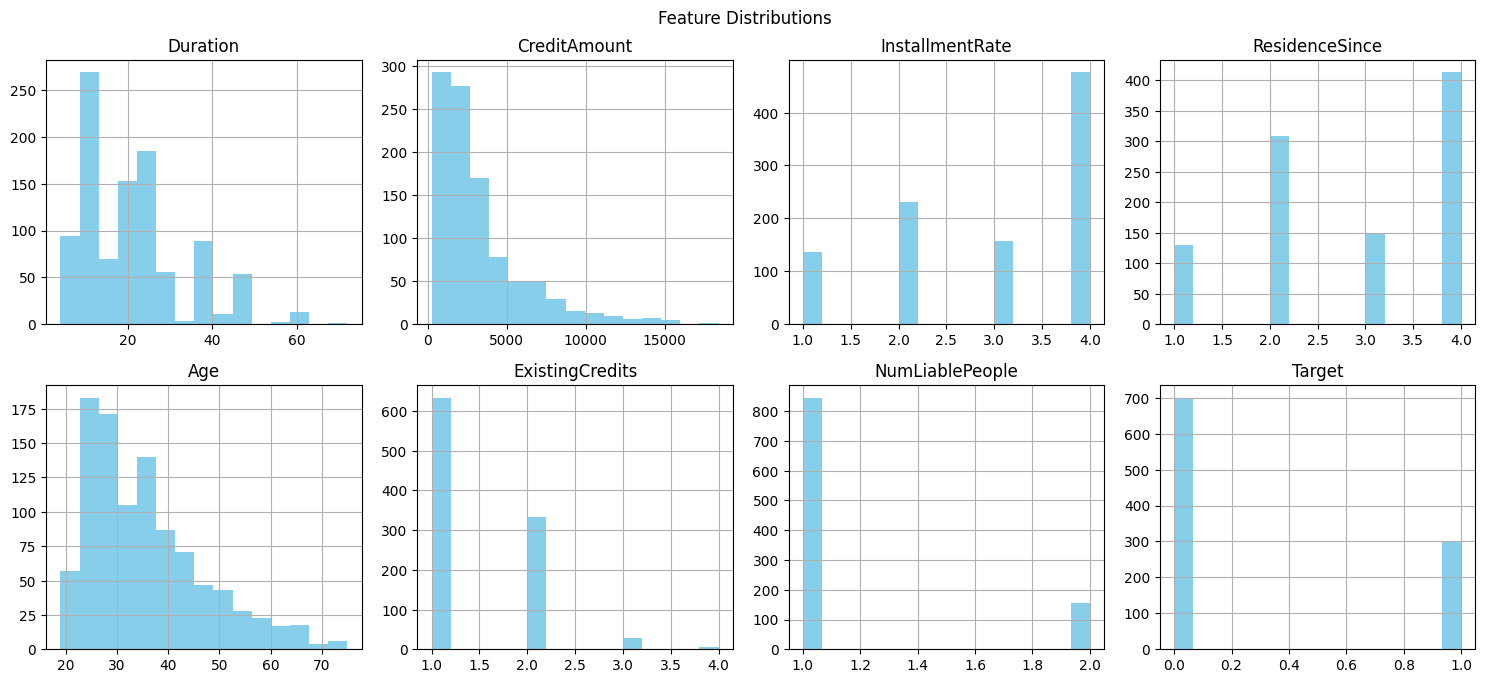

In [8]:
# Feature Distribution for Numerical Columns
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4), color='skyblue')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

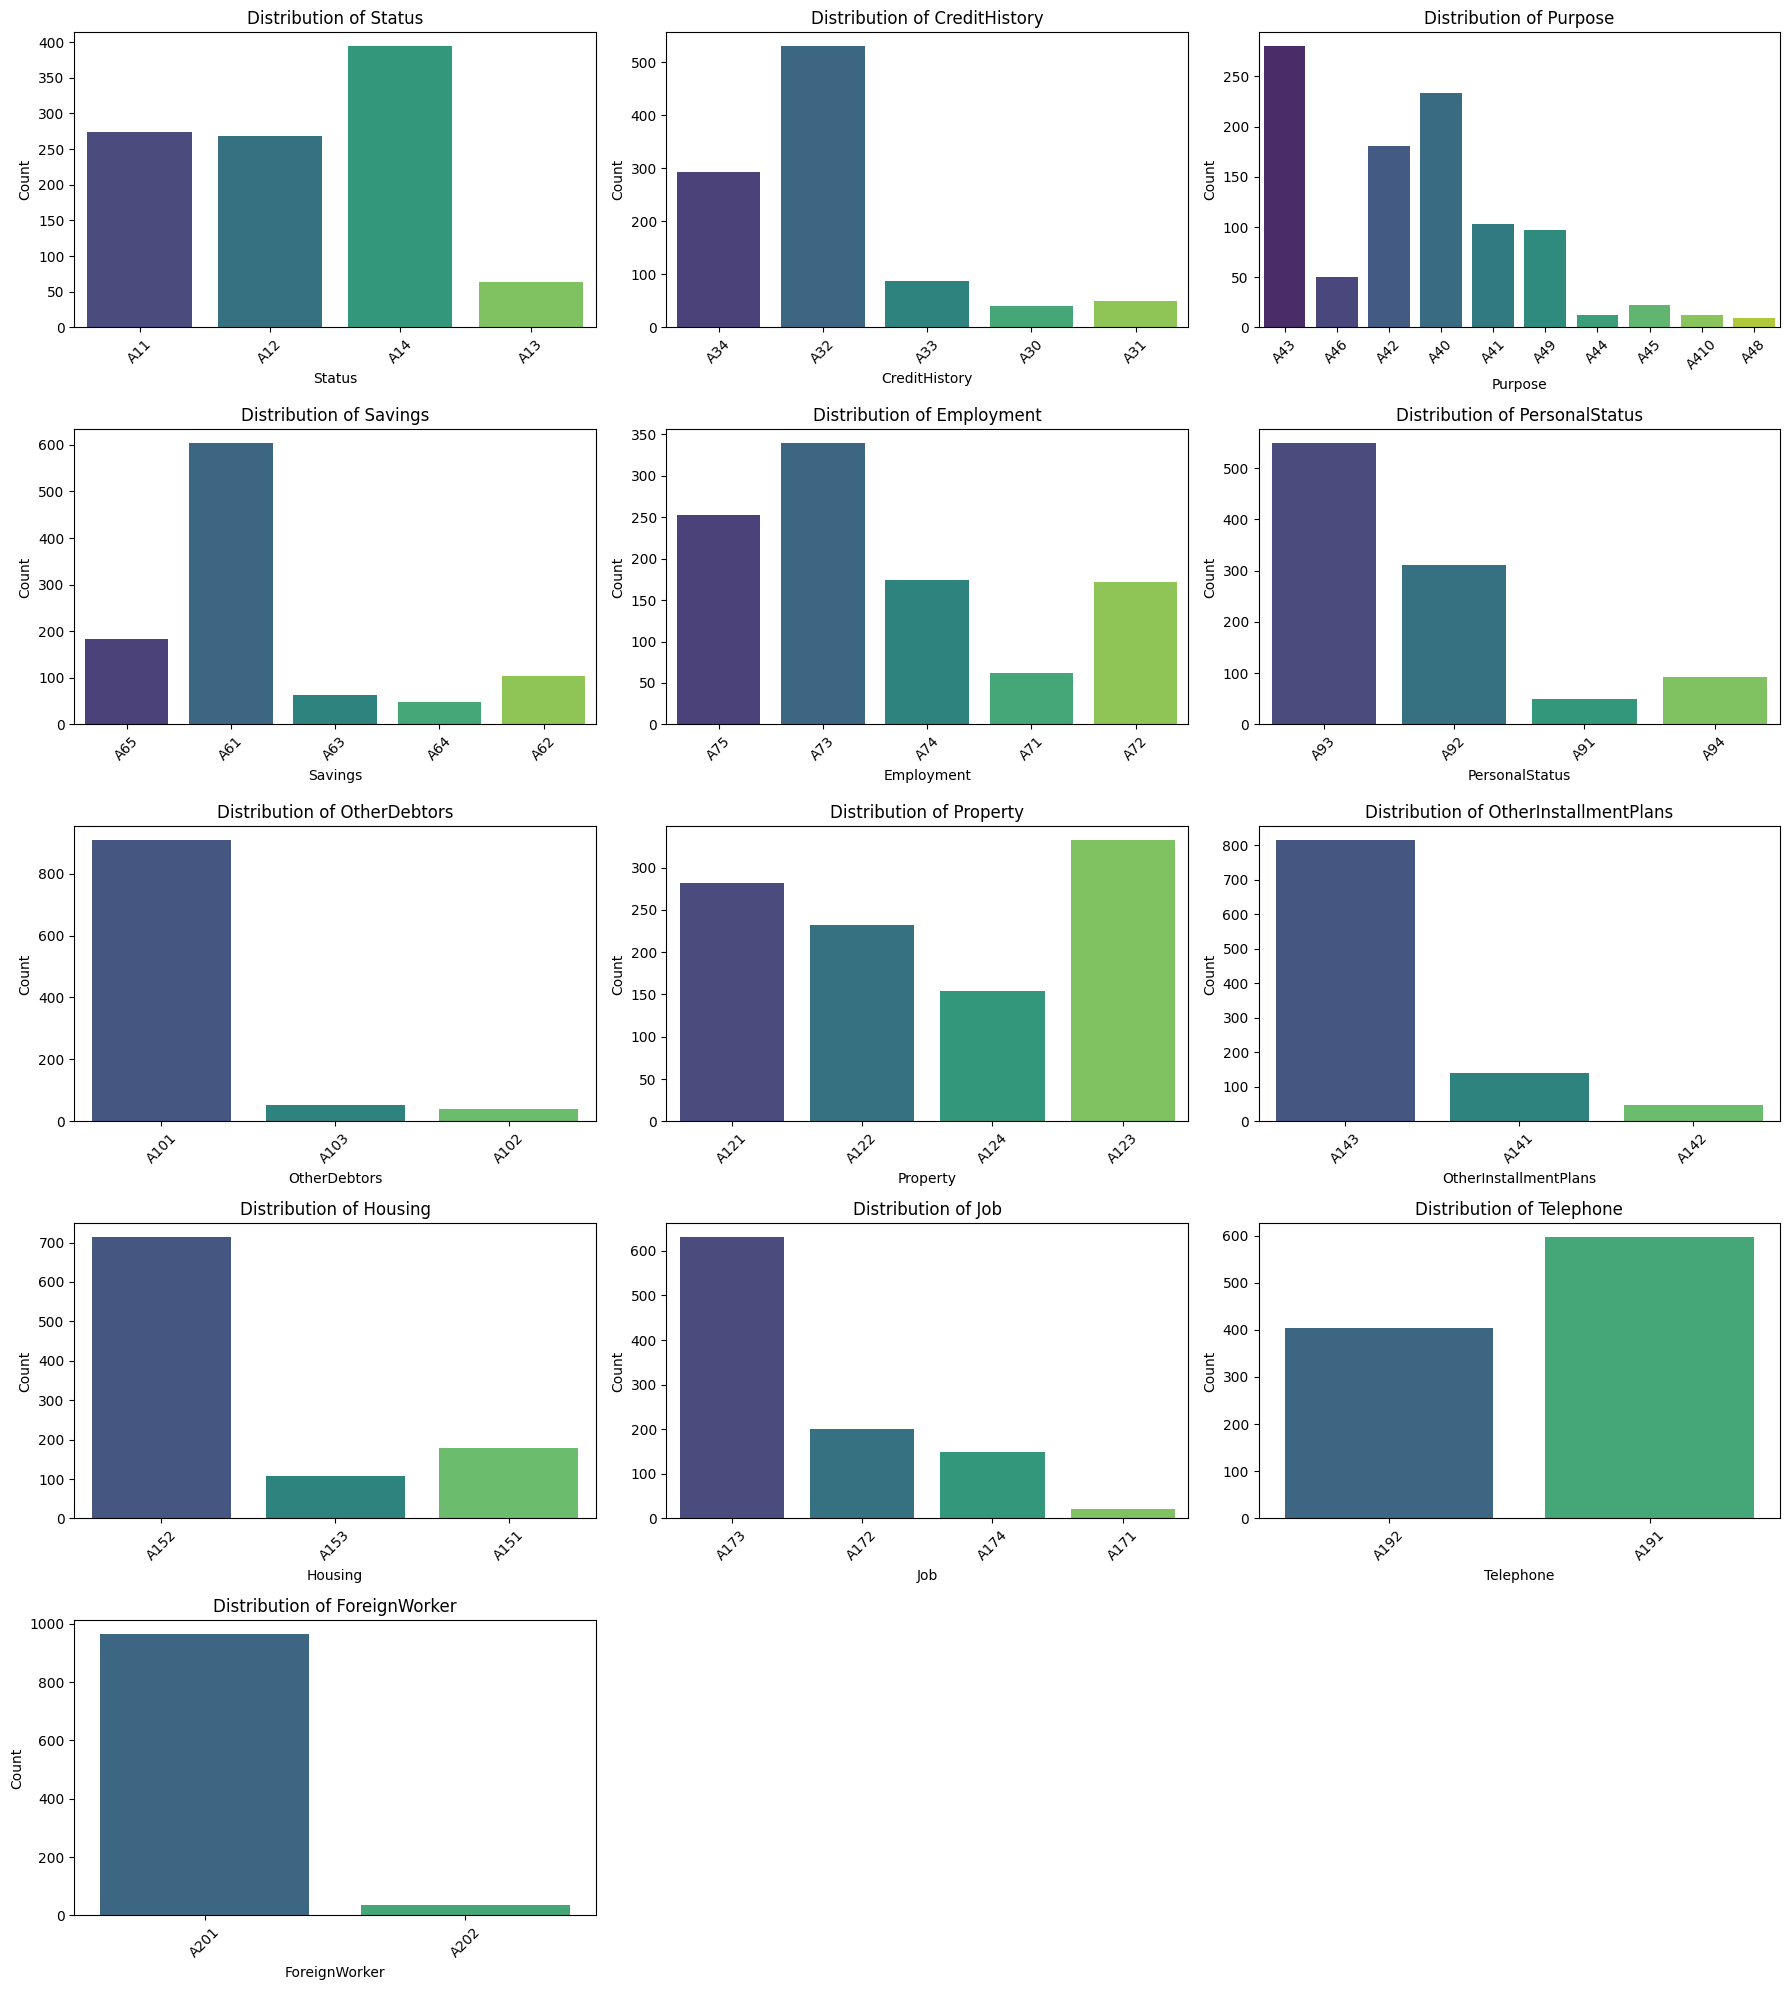

In [9]:
# Reload the original dataset if necessary
original_data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Identify categorical columns
categorical_cols = original_data.select_dtypes(include='object').columns

# Define the number of rows and columns for the grid
n_cols = 3  # Number of plots per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate required rows

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=original_data, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


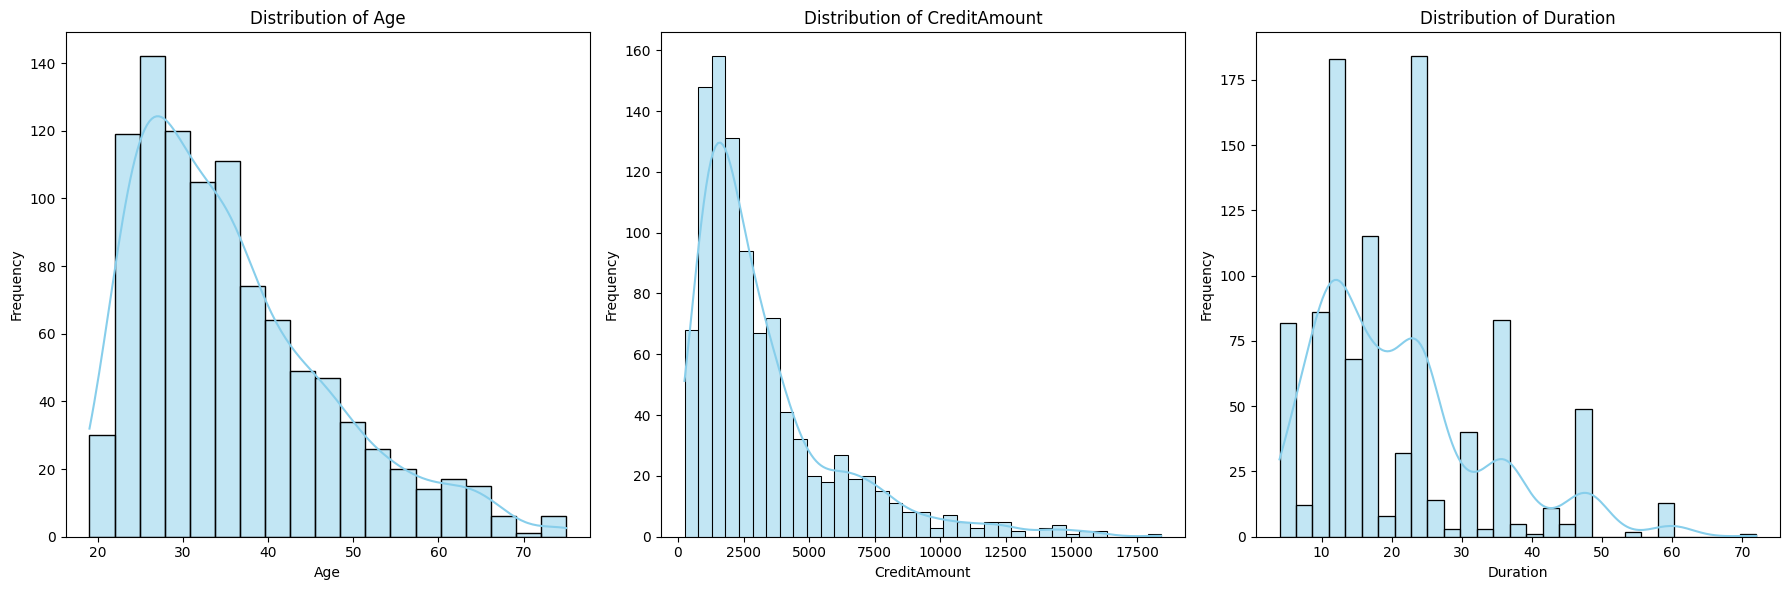

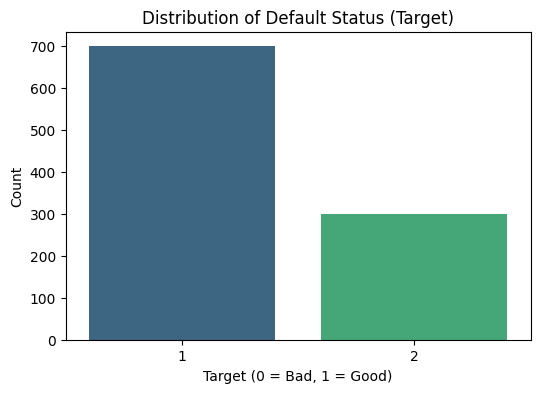

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the original dataset if necessary
original_data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# 1. Plot distributions of numerical variables like Age, CreditAmount, etc.
numerical_cols = ['Age', 'CreditAmount', 'Duration']  # Example numerical columns, add more as needed

# Create a grid of subplots for numerical variables distributions
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(original_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Plot the distribution of the target variable (default status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=original_data, palette="viridis")
plt.title('Distribution of Default Status (Target)')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('Count')
plt.show()



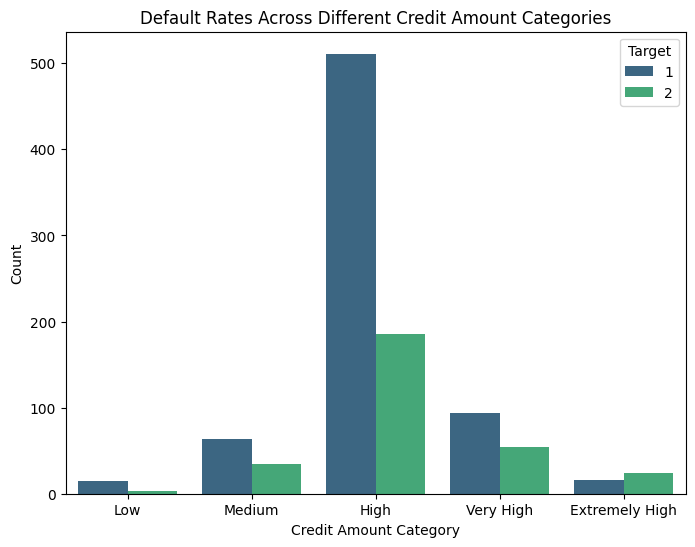

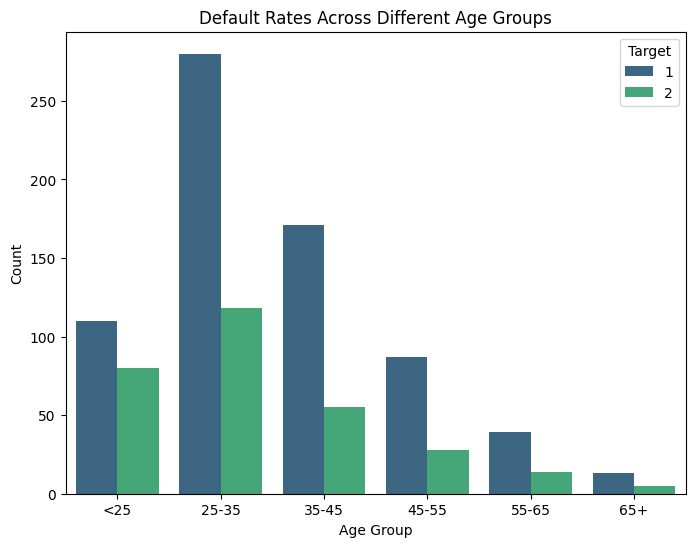

In [11]:
# Insights: Exploring default rates across different income brackets or credit amounts
# Assuming 'CreditAmount' and 'Income' are available
# If 'Income' is not available, you could group by 'Age' or 'CreditAmount'
# Create bins for CreditAmount (example: you can modify as per your analysis needs)
credit_bins = [0, 500, 1000, 5000, 10000, 50000]
credit_labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
original_data['CreditAmountCategory'] = pd.cut(original_data['CreditAmount'], bins=credit_bins, labels=credit_labels)

# Plot default rate by Credit Amount category
plt.figure(figsize=(8, 6))
sns.countplot(x='CreditAmountCategory', hue='Target', data=original_data, palette='viridis')
plt.title('Default Rates Across Different Credit Amount Categories')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.show()

# Exploring default rate by Age group (optional, if Age seems relevant)
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
original_data['AgeGroup'] = pd.cut(original_data['Age'], bins=age_bins, labels=age_labels)

# Plot default rate by Age group
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Target', data=original_data, palette='viridis')
plt.title('Default Rates Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


# Handle Class Imbalance

In [12]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("\nClass Distribution After SMOTE:")
print(y_resampled.value_counts())



Class Distribution After SMOTE:
Target
0    700
1    700
Name: count, dtype: int64


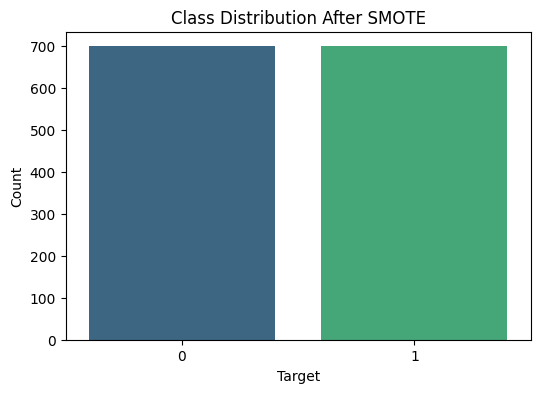

In [13]:
# Class Distribution After SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Split data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

print("\nData split:")
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Data split:
Training set size: (980, 48), Test set size: (420, 48)


# Standardize numerical features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nStandardization Completed.")


Standardization Completed.


# Evaluate models

# Logistic Regression (Baseline Model)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Evaluation:
Accuracy: 0.8190
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       218
           1       0.80      0.83      0.82       202

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



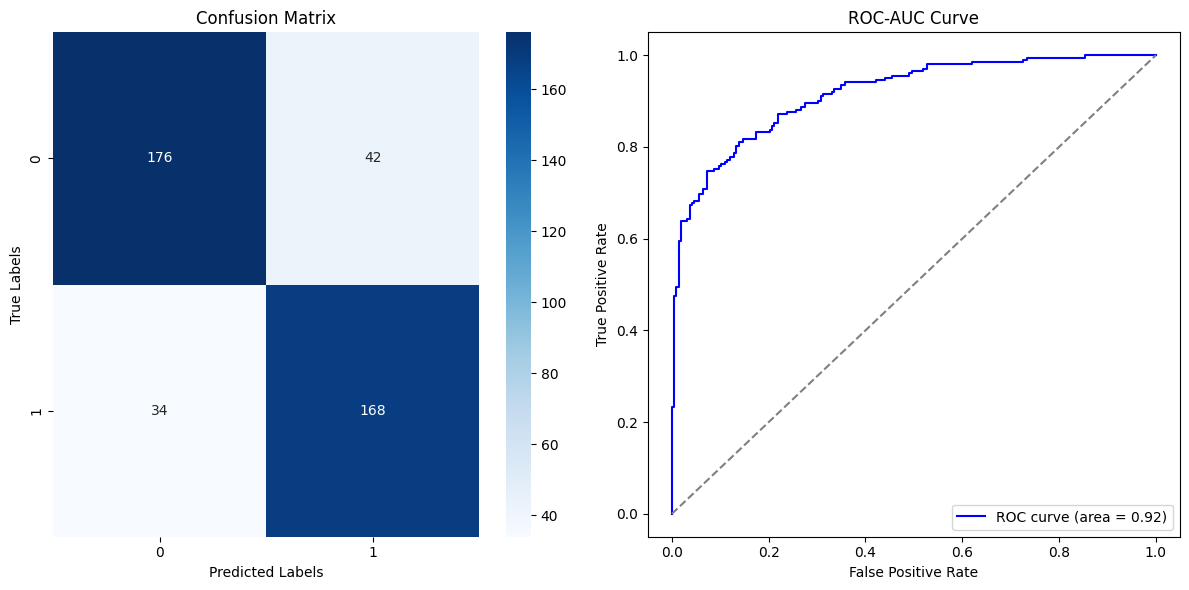

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Generate ROC-AUC data
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
roc_auc = auc(fpr, tpr)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot ROC-AUC curve
axes[1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
axes[1].set_title('ROC-AUC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc='lower right')

# Display the plots
plt.tight_layout()
plt.show()


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Evaluation:
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       218
           1       0.82      0.84      0.83       202

    accuracy                           0.83       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.83      0.83       420



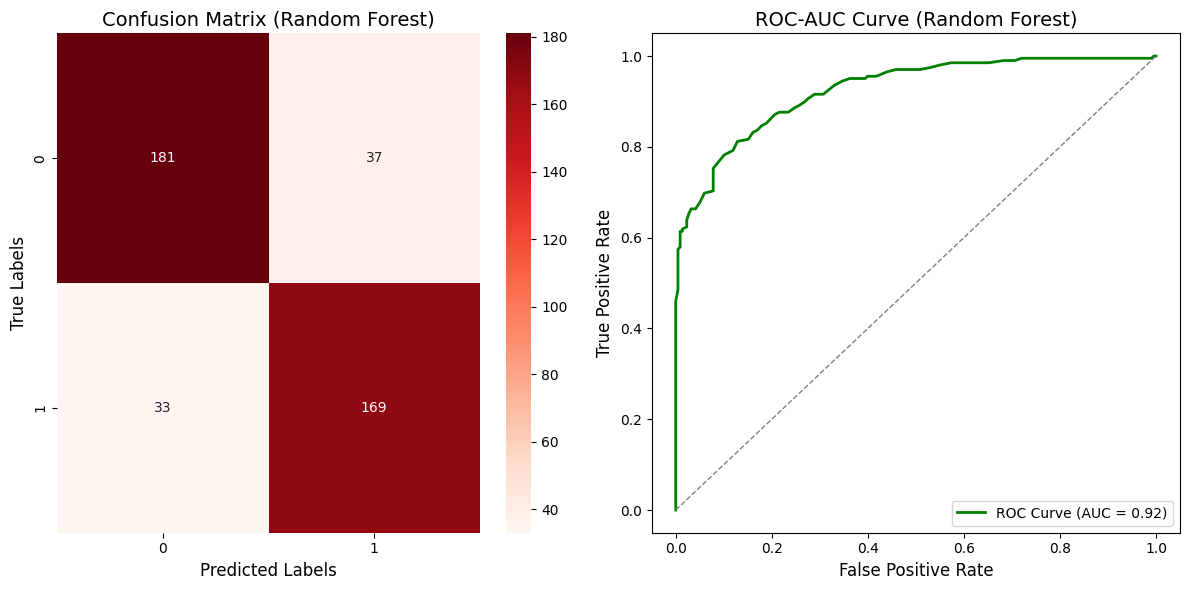

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Generate ROC-AUC data
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with a "Reds" color palette
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('Confusion Matrix (Random Forest)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with a "Green" color scheme
axes[1].plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve (AUC = {roc_auc_rf:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (Random Forest)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Evaluation:
Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       218
           1       0.75      0.76      0.76       202

    accuracy                           0.77       420
   macro avg       0.77      0.77      0.77       420
weighted avg       0.77      0.77      0.77       420



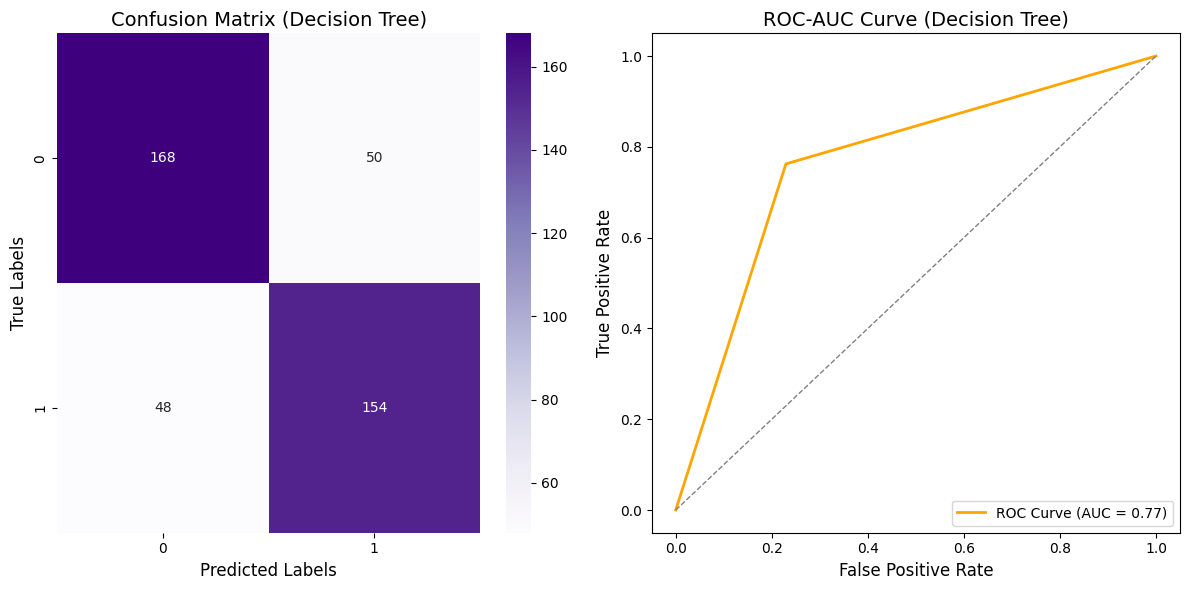

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Generate ROC-AUC data
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with "Purples" color palette
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Confusion Matrix (Decision Tree)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with "Orange" color scheme
axes[1].plot(fpr_dt, tpr_dt, color='orange', label=f'ROC Curve (AUC = {roc_auc_dt:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (Decision Tree)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Boosting Methods (XGBoost & LightGBM)

# XGBoost

In [31]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:09:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Evaluation:
Accuracy: 0.8310
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       218
           1       0.82      0.84      0.83       202

    accuracy                           0.83       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.83      0.83       420



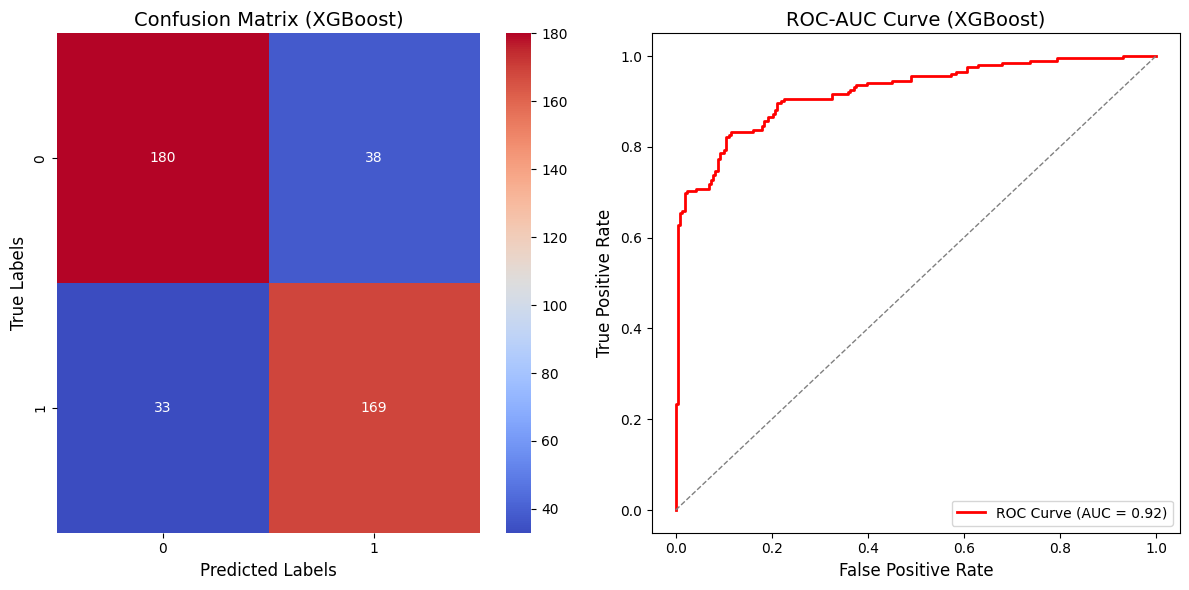

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Generate ROC-AUC data
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with a "coolwarm" color palette
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
axes[0].set_title('Confusion Matrix (XGBoost)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with "Blue-Red" gradient
axes[1].plot(fpr_xgb, tpr_xgb, color='red', label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (XGBoost)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# LightGBM

In [30]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Evaluate LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 498, number of negative: 482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508163 -> initscore=0.032656
[LightGBM] [Info] Start training from score 0.032656
LightGBM Evaluation:
Accuracy: 0.8405
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       218
           1       0.83      0.84      0.83       202

    accuracy                           0.84       420
   macro avg       0.84      0.84      0.84       420
weighted avg       0.84      0.84      0.84       420



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


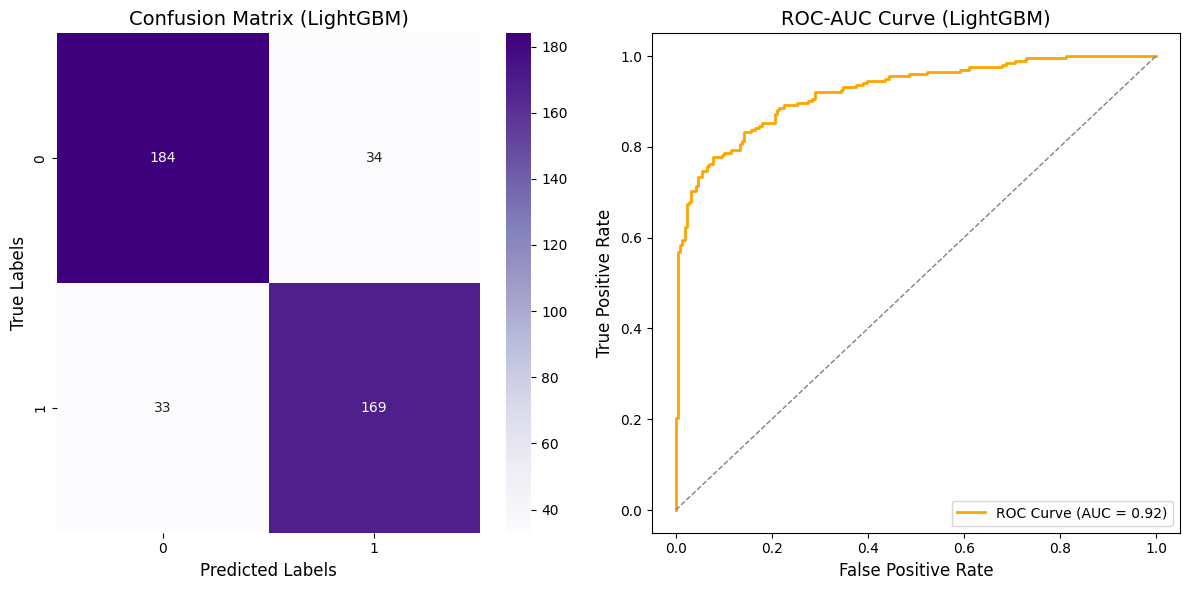

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Generate ROC-AUC data
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with a "viridis" color palette
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Confusion Matrix (LightGBM)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with a "Cyan" color scheme
axes[1].plot(fpr_lgbm, tpr_lgbm, color='orange', label=f'ROC Curve (AUC = {roc_auc_lgbm:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (LightGBM)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Evaluation:
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       218
           1       0.81      0.85      0.83       202

    accuracy                           0.83       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.83      0.83       420



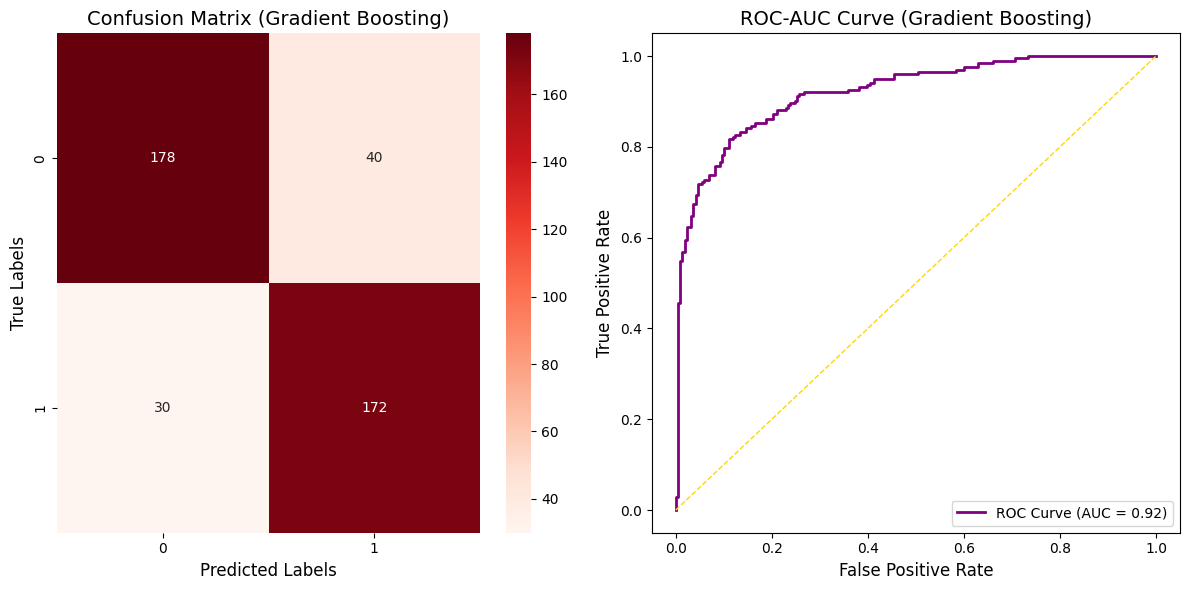

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Generate ROC-AUC data
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with a "plasma" color palette
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('Confusion Matrix (Gradient Boosting)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with "Purple-Gold" color scheme
axes[1].plot(fpr_gb, tpr_gb, color='purple', label=f'ROC Curve (AUC = {roc_auc_gb:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='gold', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (Gradient Boosting)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Neural Networks (ANN)

In [21]:
from sklearn.neural_network import MLPClassifier

# Train ANN
ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Evaluate ANN
y_pred_ann = ann_model.predict(X_test)
print("ANN Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann):.4f}")
print(classification_report(y_test, y_pred_ann))


ANN Evaluation:
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       218
           1       0.79      0.80      0.79       202

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



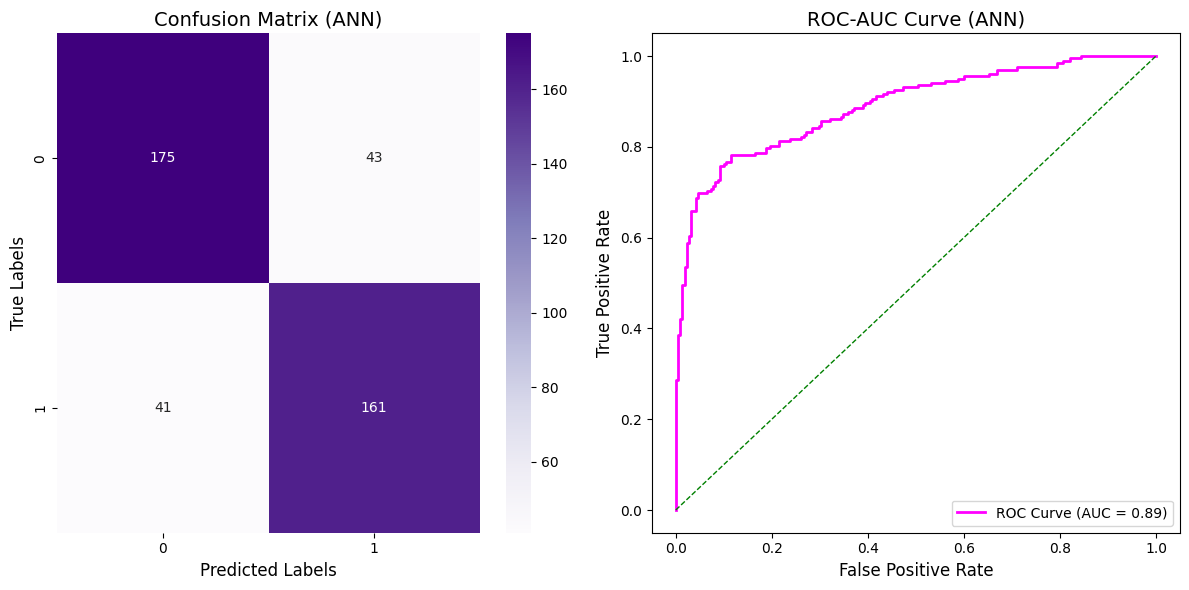

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Generate ROC-AUC data
y_prob_ann = ann_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with "cool" color palette
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Confusion Matrix (ANN)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with "Green-Magenta" scheme
axes[1].plot(fpr_ann, tpr_ann, color='magenta', label=f'ROC Curve (AUC = {roc_auc_ann:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='green', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (ANN)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Stacked Model (Stack Random Forest, XGBoost, and LightGBM)

In [22]:
from sklearn.ensemble import StackingClassifier

# Create a Stacked Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacked_model.fit(X_train, y_train)

# Evaluate Stacked Model
y_pred_stacked = stacked_model.predict(X_test)
print("Stacked Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacked):.4f}")
print(classification_report(y_test, y_pred_stacked))


C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:04:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 498, number of negative: 482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508163 -> initscore=0.032656
[LightGBM] [Info] Start training from score 0.032656


C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 398, number of negative: 386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507653 -> initscore=0.030615
[LightGBM] [Info] Start training from score 0.030615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 398, number of negative: 386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507653 -> initscore=0.030615
[LightGBM] [Info] Start training from score 0.030615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 399, number of negative: 385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508929 -> initscore=0.035718
[LightGBM] [Info] Start training from score 0.035718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


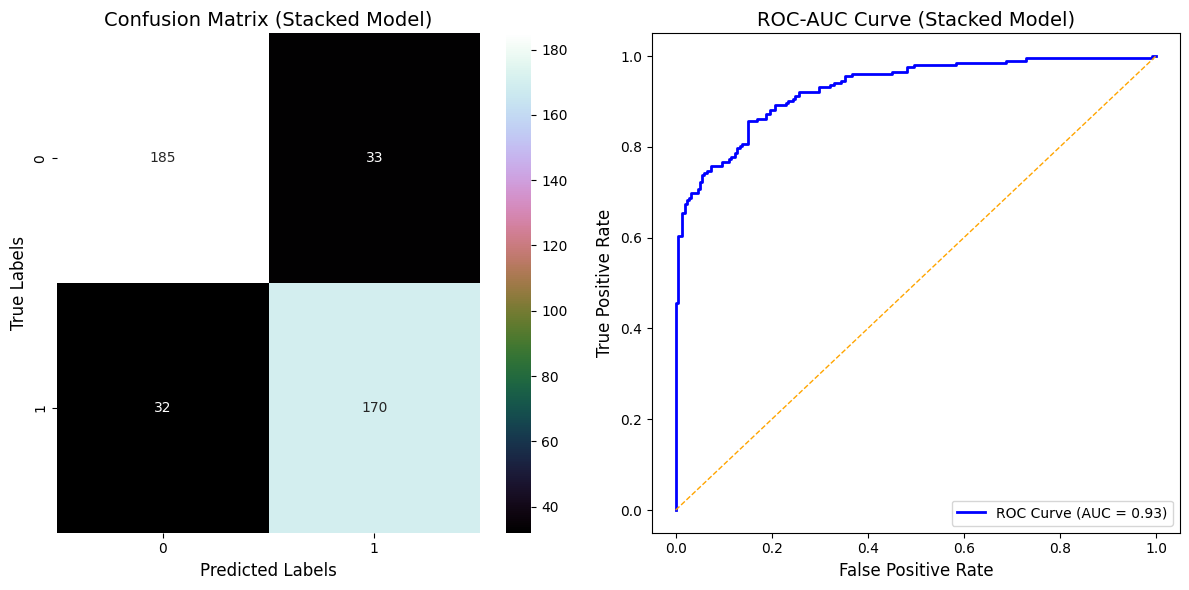

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
conf_matrix_stacked = confusion_matrix(y_test, y_pred_stacked)

# Generate ROC-AUC data
y_prob_stacked = stacked_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr_stacked, tpr_stacked, thresholds_stacked = roc_curve(y_test, y_prob_stacked)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix with "cubehelix" color palette
sns.heatmap(conf_matrix_stacked, annot=True, fmt='d', cmap='cubehelix', ax=axes[0])
axes[0].set_title('Confusion Matrix (Stacked Model)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot ROC-AUC curve with "Blue-Orange" scheme
axes[1].plot(fpr_stacked, tpr_stacked, color='blue', label=f'ROC Curve (AUC = {roc_auc_stacked:.2f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], color='orange', linestyle='--', linewidth=1)  # Diagonal reference line
axes[1].set_title('ROC-AUC Curve (Stacked Model)', fontsize=14)
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Feature Selection Using Information Gain

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Information Gain (Mutual Information)
mutual_info = mutual_info_classif(X_train, y_train)

# Create a DataFrame to show feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': mutual_info
})

# Sort features by Information Gain
feature_importance = feature_importance.sort_values(by='Information Gain', ascending=False)

# Display top features
print("Top Features Based on Information Gain:")
print(feature_importance.head())


Top Features Based on Information Gain:
                       Feature  Information Gain
9                   Status_A14          0.122838
1                 CreditAmount          0.111107
0                     Duration          0.089019
8                   Status_A13          0.064949
40  OtherInstallmentPlans_A143          0.061103


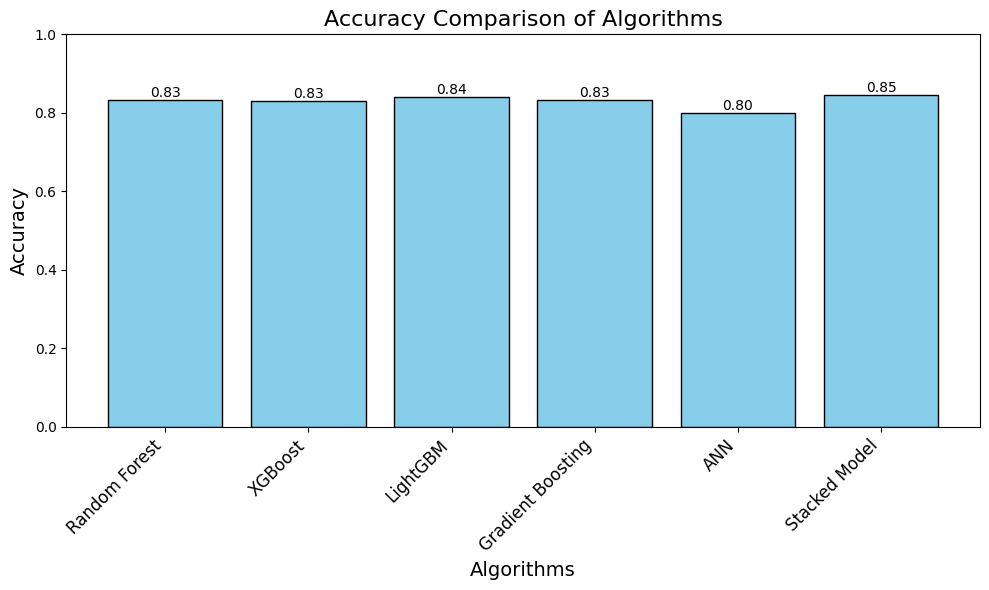

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy scores
accuracy_scores = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'LightGBM': accuracy_score(y_test, y_pred_lgbm),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb),
    'ANN': accuracy_score(y_test, y_pred_ann),
    'Stacked Model': accuracy_score(y_test, y_pred_stacked)
}

# Extract data for plotting
algorithms = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies, color='skyblue', edgecolor='black')

# Add text annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Accuracy Comparison of Algorithms', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Show plot
plt.tight_layout()
plt.show()

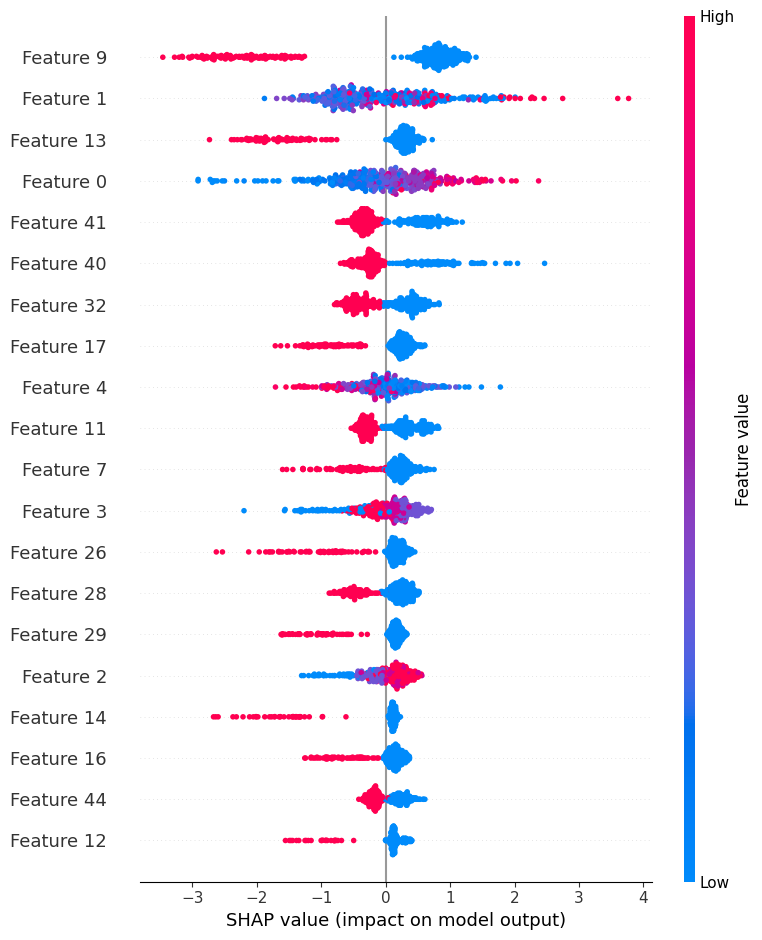

In [24]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model)  # You can use the model you're interested in (XGBoost, LightGBM)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)


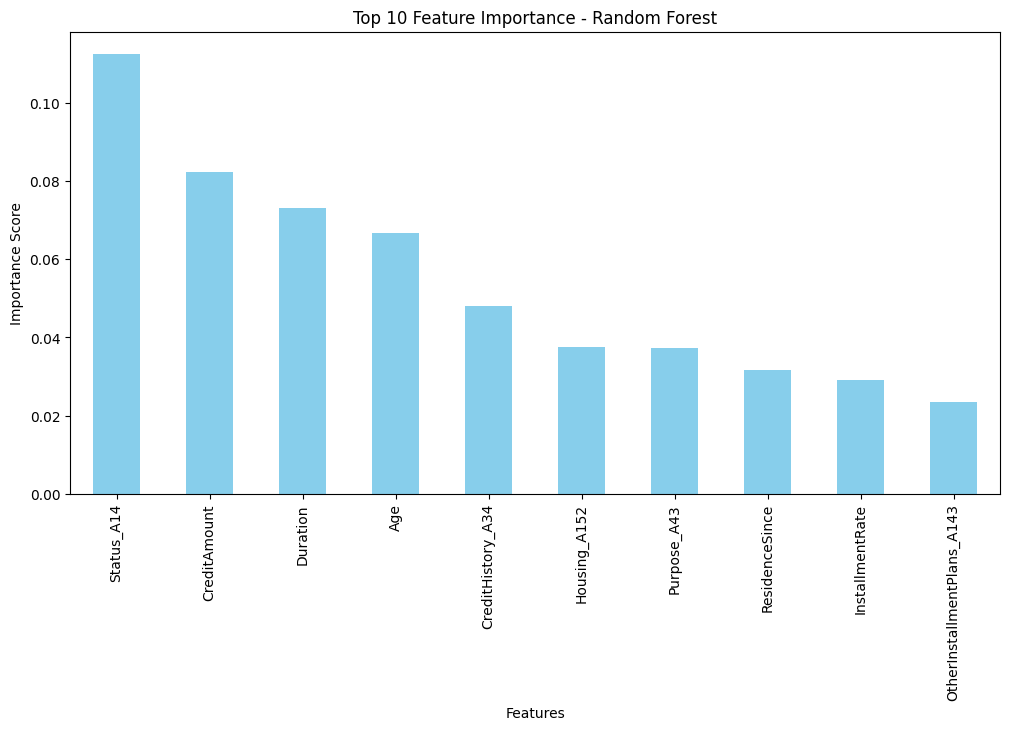

In [43]:
# Feature Importance (Example for Random Forest)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(12, 6))
feature_importance[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()
